# Walkthrough

## Learning Objectives
At the end of this learning activity you will be able to:
* Create categorical comparisons with countplots.
* Create quantitative comparison plots with seaborn: stripplot, barplot, boxplot with Seaborn.
* Create correlation style plots with with scatterplot and regplot.
* Utilize `pd.melt` to plot wide data with seaborn.
* Describe bootstapping and confidence intervals.

This week we will continue our exploration of data from a cohort study participants of People Living with HIV (PLwH) here at Drexel.

As we discussed in the introduction, this data collection effort was done to provide a resource for many projects across the fields of HIV, aging, inflammation, neurocognitive impairment, immune function, and unknowable future projects.
In this walkthrough we will explore a collection of cytokines and chemokines measured by a Luminex panel of common biomarkers of inflammation.
We use this data to look for correlations between cytokine biomarkers and demographic variables.

## Grammar of Graphics

The Grammar of Graphics is a comprehensive framework for describing and constructing a wide variety of statistical graphics.
This philosophy was first introduced by Leland Wilkinson in his book "The Grammar of Graphics," published in 1999.
It provides a conceptual foundation for understanding the components of statistical graphics, allowing for the systematic and principled design of visualizations.

At its core, the Grammar of Graphics treats the creation of statistical graphics as a coherent system, akin to a language.
Just as a language has grammar rules that dictate how words can be combined to convey different meanings, the Grammar of Graphics defines a set of rules for combining data and graphical elements to produce meaningful representations of information.

Key components of this philosophy include:

* **Data**: The actual dataset being visualized. This is the starting point for any graphic.
* **Geometries** (Geom): The geometric shapes that represent data points on the graph, such as lines, bars, points, etc.
* **Aesthetics** (Aes): Attributes of the geometric shapes, such as color, size, shape, and position, which can be mapped to variables in the data to convey additional information.
* **Scales**: Transformations applied to the data before it is mapped to aesthetics, allowing for adjustments in how data values are represented graphically (e.g., logarithmic scales).
* **Coordinates** (Coord): The space in which the data is plotted, which can be manipulated to change the viewpoint or aspect ratio of the graph.
* **Facets**: Tools for splitting data into subsets and displaying them as small multiples, making it easier to compare groups or patterns within the data.
* **Statistics** (Stat): Statistical transformations that summarize or alter the raw data before it is visualized, such as binning or calculating means.

The Grammar of Graphics empowers users to build a wide range of graphics from simple to complex by explicitly stating how data should map onto aesthetic attributes and geometric objects.

### Seaborn

Seaborn is a Python data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. Its primary goal is to make it easier for data scientists and analysts to explore and understand their data. Seaborn aims to simplify the process of creating complex visualizations that would otherwise require substantial code with matplotlib, making data visualization more accessible and less time-consuming.

The library was developed by Michael Waskom and first released in 2012. Since its inception, Seaborn has grown in popularity within the data science community for its ability to handle pandas data structures effortlessly and its beautiful default styles and color palettes that improve the aesthetics of standard matplotlib plots. It integrates closely with pandas, a library providing high-performance, easy-to-use data structures, and data analysis tools for Python.

Seaborn is particularly well-suited for exploratory data analysis (EDA), allowing users to quickly visualize distributions, relationships, and trends in their data. It supports various types of plots including, but not limited to, categorical plots, relational plots, distribution plots, regression plots, and matrix plots. This versatility makes Seaborn a valuable tool for a wide range of statistical analysis tasks.

The library is also extendable and customizable, enabling users to tweak the visual presentation of their plots to suit their needs or the needs of their audience. This balance of ease-of-use and flexibility has contributed to Seaborn's status as a fundamental tool in the Python data visualization ecosystem, useful in academic research, industry projects, and beyond.

### Seaborn interface

The essence of the grammar of graphics is to break down graphs into semantic components such as scales, geoms (geometric objects), stats (statistical transformations), and coordinates. These components can be systematically combined to create a vast array of different types of visualizations.
Seaborn abstracts these concepts in a way that allows users to think about their data visualization in terms of the distribution, relationship, and trends of the data, rather than focusing on the detailed specifications of the graphic itself.

Seaborn's interface philosophy emphasizes simplicity, flexibility, and the ability to leverage pandas data structures efficiently.
It is designed to work well within the Python data ecosystem and integrates closely with pandas DataFrame objects, making it straightforward to create complex visualizations from data stored in DataFrames. The library provides functions that abstract away many of the lower-level details required by matplotlib, enabling users to generate sophisticated statistical visualizations with relatively concise code.

In summary, Seaborn's interface is designed to be:

* High-level and accessible: Users can generate complex plots from data in pandas DataFrames with a single function call.
* Statistically-informed: Seaborn includes functions for visualizing complex statistical relationships and trends in data.
* Customizable and extendable: While it offers beautiful defaults, Seaborn plots can be extensively customized to fit the user's needs.
* Integrated with the Python data science stack: It works seamlessly with pandas and numpy data structures, making it a convenient tool for data analysis workflows.

Through its high-level interface, Seaborn encourages exploration and understanding of data via visualization, following the grammar of graphics philosophy by allowing users to think more about the data and less about the specifics of making plots.

### Documentation

I HIGHLY recommend exploring and utilizing the documentation for this tool:

* Base: https://seaborn.pydata.org/
* Gallery of great examples: https://seaborn.pydata.org/examples/index.html
* Function documentation: (We will be using the _Function Interface_. https://seaborn.pydata.org/api.html#function-interface
* Tutorial: https://seaborn.pydata.org/tutorial.html

When I'm making figures I'll usually have the documentation open on another tab.

---------------------------------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This is how we normally import seaborn
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('cytokine_data.csv')
data.head()

,Sex,Age,isAA,egf,eotaxin,fgfbasic,gcsf,gmcsf,hgf,ifnalpha,...,mig,mip1alpha,mip1beta,tnfalpha,vegf,cocaine_use,cannabinoid_use,neuro_screen_impairment_level,bmi,years_infected
0,Male,53.0,Checked,65.01,170.20,50.32,117.14,2.51,481.37,110.79,...,185.29,104.63,151.15,17.61,7.54,True,True,none,21,18
1,Female,62.0,Checked,232.83,118.23,36.03,215.38,24.53,988.71,66.13,...,397.24,242.10,230.87,51.22,31.60,True,True,none,22,16
2,Male,60.0,Checked,84.84,55.27,13.22,14.08,0.48,364.31,78.67,...,18.63,34.85,68.34,2.48,0.84,False,False,none,25,16
3,Male,62.0,Checked,24.13,70.18,4.12,14.08,1.33,510.36,118.64,...,118.63,113.30,49.15,10.93,3.53,True,True,impaired,29,21
4,Male,54.0,Checked,186.98,69.18,32.56,184.74,12.55,395.87,40.79,...,140.56,131.83,241.00,32.01,10.81,True,True,none,26,16


## Categorical Comparisons

### Counting with `countplot`

<Axes: xlabel='neuro_screen_impairment_level', ylabel='count'>

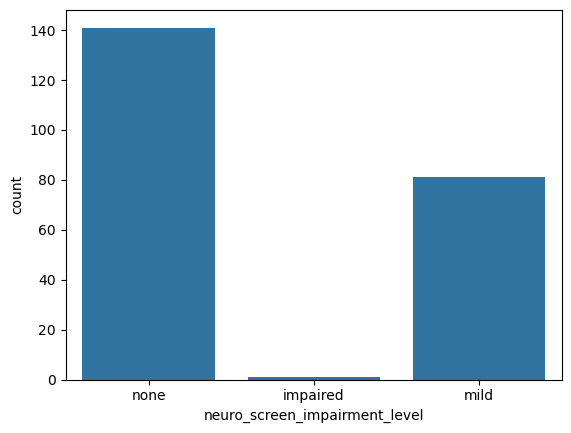

In [4]:
sns.countplot(data = data, # Pass the Dataframe `data` into the kwarg `data`
              x = 'neuro_screen_impairment_level')

<Axes: xlabel='neuro_screen_impairment_level', ylabel='count'>

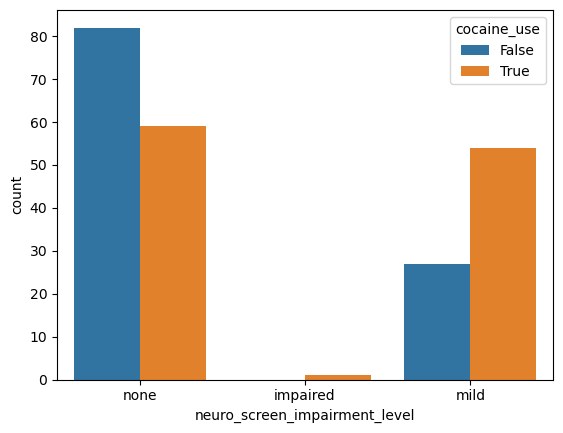

In [5]:
sns.countplot(data = data, # Pass the Dataframe `data` into the kwarg `data`
              x = 'neuro_screen_impairment_level',
              hue = 'cocaine_use')

If we wanted to look at multiple columns.
It would be wonderful if we could do this:

In [6]:
# This doesn't work

# sns.countplot(data = data,
#               x = 'neuro_screen_impairment_level',
#               hue = ['cocaine_use', 'cannabinoid_use'])

But, we can create a new column that is the combination of the two:

In [7]:
def use_desc(row):
    cocaine = 'Y' if row['cocaine_use'] else 'N'
    cannabinoid = 'Y' if row['cannabinoid_use'] else 'N'
    return cocaine+cannabinoid

data['multi_use'] = data.apply(use_desc, axis=1)

While we're doing transformations, let's improve our plots by converting our `neuro_screen_impairment_level` to a proper ordinal variable.
 - Categorical variables : A set of distinct and seperable groups.
 - Ordinal variables : A set of distinct and seperable groups with a sortable order.

By default, `pandas` treats all strings as `categorical` and it sorts them alphabetically.
But sometimes, we want to specify a order. We can do that like so.

In [8]:
pd.Categorical(data['neuro_screen_impairment_level'],
               categories = ['none', 'mild', 'impaired'], ordered=True)

['none', 'none', 'none', 'impaired', 'none', ..., 'none', 'mild', 'mild', 'mild', 'mild']
Length: 224
Categories (3, object): ['none' < 'mild' < 'impaired']

In [9]:
data['neuro_screen_ordinal'] = pd.Categorical(data['neuro_screen_impairment_level'],
                                               categories = ['none', 'mild', 'impaired'], ordered=True)

<Axes: xlabel='neuro_screen_ordinal', ylabel='count'>

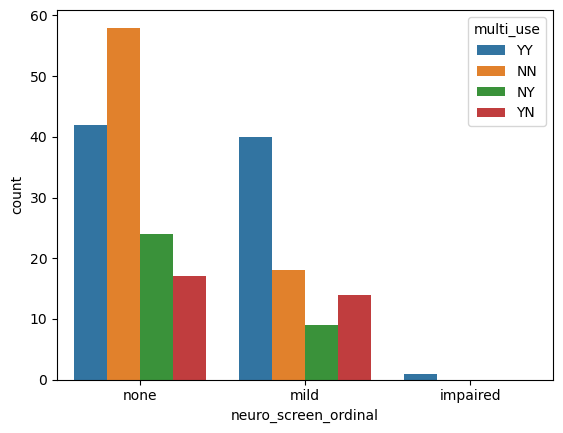

In [10]:
sns.countplot(data = data, # Pass the Dataframe `data` into the kwarg `data`
              x = 'neuro_screen_ordinal', # Seaborn will respect the ordering of our categories.
              hue = 'multi_use')

### Visualizing differences across categories with `stripplot`

<Axes: xlabel='neuro_screen_ordinal', ylabel='mcp1'>

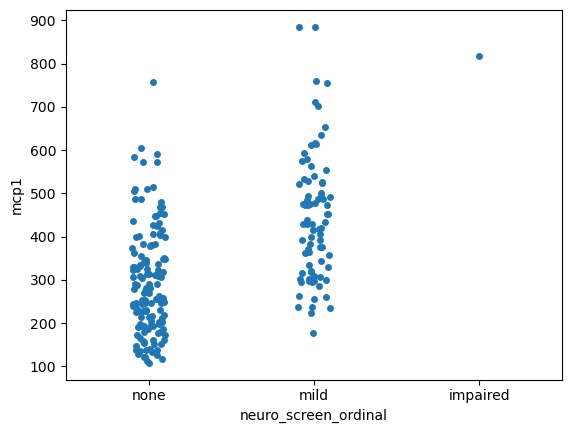

In [11]:
sns.stripplot(data = data,
              x = 'neuro_screen_ordinal',
              y = 'mcp1')

<Axes: xlabel='neuro_screen_ordinal', ylabel='mcp1'>

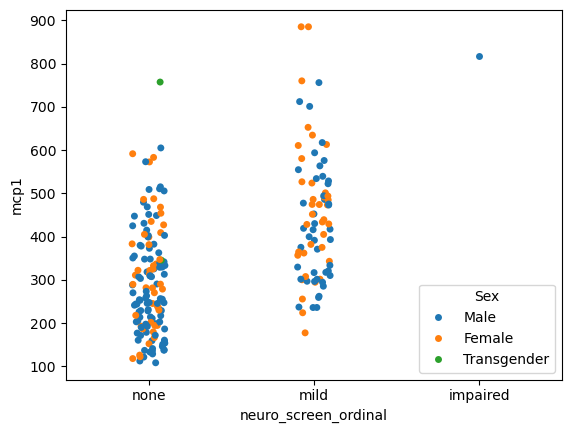

In [12]:
sns.stripplot(data = data,
              x = 'neuro_screen_ordinal',
              hue = 'Sex',
              y = 'mcp1')
# Try dodge = True

You can even put plots on top of plots!

<Axes: xlabel='neuro_screen_ordinal', ylabel='mcp1'>

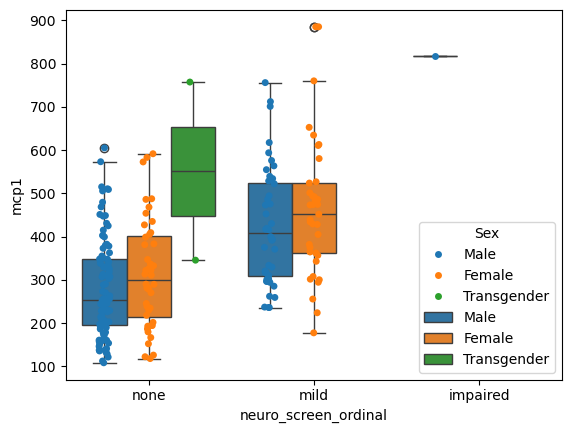

In [13]:
# Grab the axis object that was created
ax = sns.stripplot(data = data,
                   x = 'neuro_screen_ordinal',
                   hue = 'Sex',
                   y = 'mcp1',
                   dodge = True)


sns.boxplot(data = data,
              x = 'neuro_screen_ordinal',
              hue = 'Sex',
              y = 'mcp1',
              ax = ax) # Give that axis to the next plot

## Quantifying the uncertainty of estimates

When presenting data it is important to rigorously convey the precision and uncertainty of our estimates.
I HIGHLY recommend reading the error bar tutorial in seaborn.
Below is a quick summary.


> The error bars around an estimate of central tendency can show one of two general things: either the range of uncertainty about the estimate or the spread of the underlying data around it.
> These measures are related: given the same sample size, estimates will be more uncertain when data has a broader spread. But uncertainty will decrease as sample sizes grow, whereas spread will not.


![Error bar taxonomy](https://seaborn.pydata.org/_images/error_bars_2_0.svg)

* Value Spread: How much each value differs from every other value
  * Standard deviation: Average difference of each point from the mean.
  * Percentile Interval: Middle range that contains some percent of the data.
* Estimate Uncertainty: What is the reasonable range of my estimate
  * Standard Error: Standard deviation/sqrt(sample_size)
  * Confidence Intervals:
  > The nonparametric approach to representing uncertainty uses bootstrapping: a procedure where the dataset is randomly resampled with replacement a number of times, and the estimate is recalculated from each resample. This procedure creates a distribution of statistics approximating the distribution of values that you could have gotten for your estimate if you had a different sample.

### Measuring Spread

Quantifies how much each individual measurement vary around the middle.

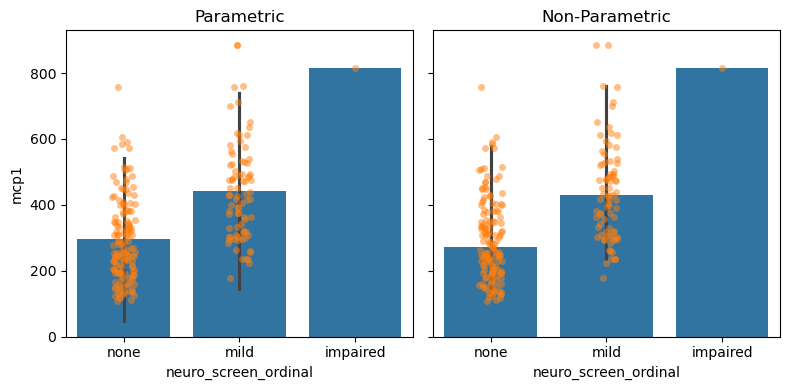

In [14]:
# Parametric Assumptions

fig, (par_ax, np_ax) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

## Plot with parametric assumpitions
sns.barplot(data = data,
            x = 'neuro_screen_ordinal',
            y = 'mcp1',
            estimator = 'mean',
            errorbar = ('sd', 2),
                ax = par_ax) # 95% CI

sns.stripplot(data = data,
              x = 'neuro_screen_ordinal',
              y = 'mcp1',
              alpha=0.5,
              ax=par_ax)
par_ax.set_title('Parametric')

## Plot with non-parametric methods

## Plot with parametric assumpitions
sns.barplot(data = data,
            x = 'neuro_screen_ordinal',
            y = 'mcp1',
            estimator = 'median',
            errorbar = ('pi', 95),
                ax = np_ax) # 95% CI

sns.stripplot(data = data,
              x = 'neuro_screen_ordinal',
              y = 'mcp1',
              alpha=0.5,
              ax=np_ax)

np_ax.set_title('Non-Parametric')

fig.tight_layout()

### Measuring Uncertainty

Quantifies how confident we are about where the middle of the distribution is.

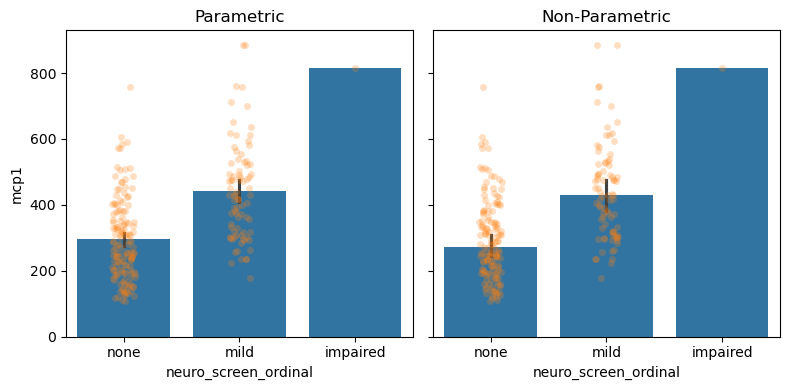

In [15]:
# Parametric Assumptions

fig, (par_ax, np_ax) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

## Plot with parametric assumpitions
sns.barplot(data = data,
            x = 'neuro_screen_ordinal',
            y = 'mcp1',
            estimator = 'mean',
            errorbar = ('se', 2),
                ax = par_ax)

sns.stripplot(data = data,
              x = 'neuro_screen_ordinal',
              y = 'mcp1',
              alpha=0.25,
              ax=par_ax)
par_ax.set_title('Parametric')

## Plot with non-parametric methods
sns.barplot(data = data,
            x = 'neuro_screen_ordinal',
            y = 'mcp1',
            estimator = 'median',
            errorbar = ('ci', 95),
                ax = np_ax)

sns.stripplot(data = data,
              x = 'neuro_screen_ordinal',
              y = 'mcp1',
              alpha=0.25,
              ax=np_ax)

np_ax.set_title('Non-Parametric')

fig.tight_layout()

With hundreds of data points, we are very confident and precise about our estimate of the middle of the distribution.

It is important to understand the effect of sample size on spread and uncertainty.
Below is a simulation that picks small subsets of the data and generates the same plot.
Before you generate it; which do you think will change with sample-size and which will stay the same?

In [16]:
def overlapped_plot(ax, df, y = 'mcp1', mode = 'spread'):
    "Create overlapped plot with different confidence assumptions"

    if mode == 'spread':
        # Use Standard Deviation
        eb = ('sd', 2)
    elif mode == 'uncertainty':
        # Use Standard error
        eb = ('se', 2)
    else:
        raise ValueError(f'Expected spread or uncertainty, got: {mode}')

    sns.barplot(data = df,
                x = 'neuro_screen_ordinal',
                y = y,
                errorbar = eb,
                ax = ax)

    sns.stripplot(data = df,
                  x = 'neuro_screen_ordinal',
                  y = y,
                  alpha=0.25,
                  ax=ax)


Sampling 10 samples for figure.
Sampling 33 samples for figure.
Sampling 57 samples for figure.
Sampling 81 samples for figure.
Sampling 105 samples for figure.
Sampling 128 samples for figure.
Sampling 152 samples for figure.
Sampling 176 samples for figure.
Sampling 200 samples for figure.
Sampling 224 samples for figure.


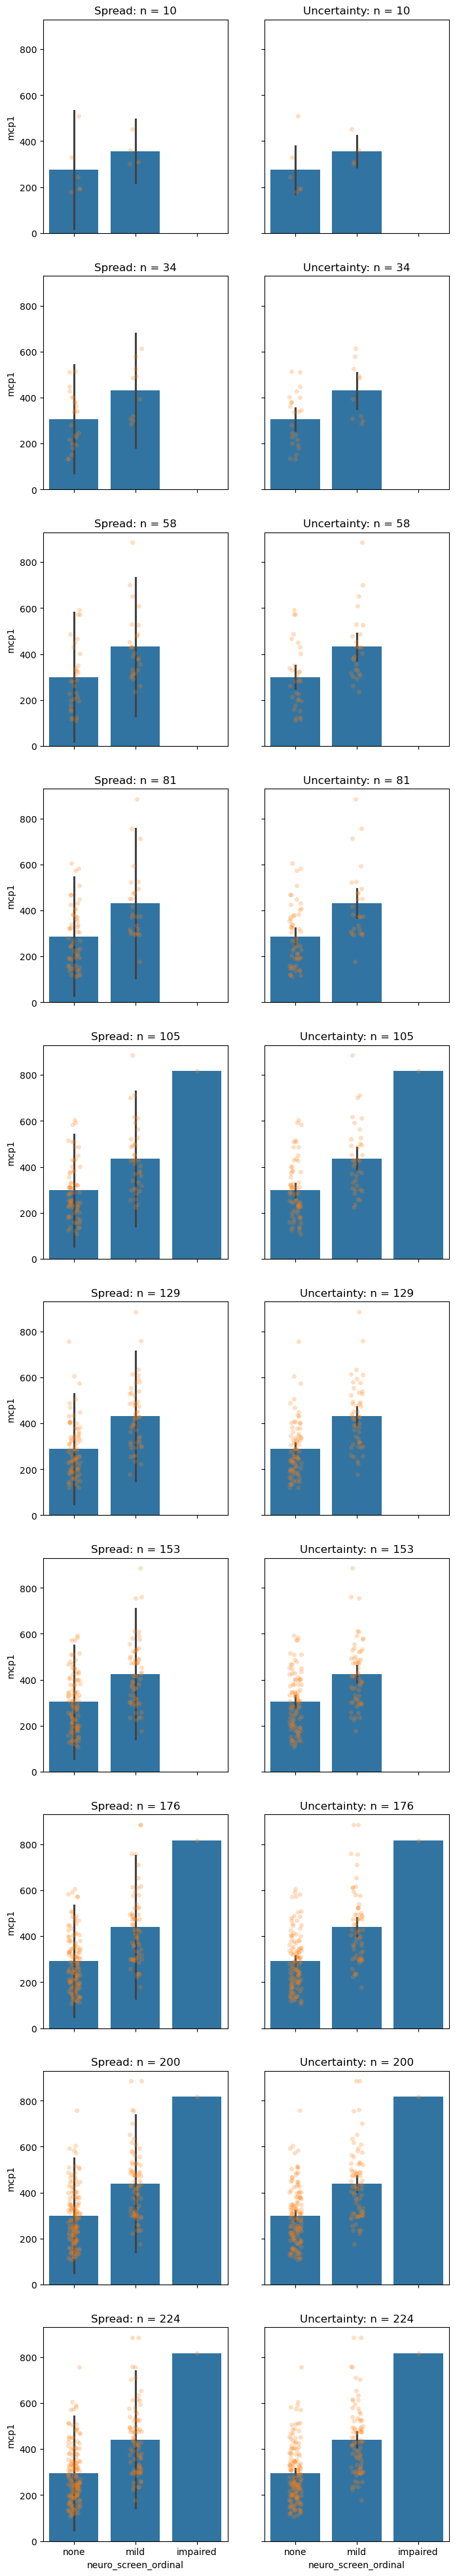

In [17]:
NBINS = 10

BINS = np.linspace(10, len(data.index), NBINS)
fig, axs = plt.subplots(len(BINS), 2, figsize=(8, 50), sharex=True, sharey=True)

for row, sample_size in enumerate(BINS):
    print('Sampling', int(sample_size), 'samples for figure.')
    ndf = data.sample(n=int(sample_size))

    spread_ax, uncer_ax = axs[row,:]

    ## Plot with parametric assumpitions
    overlapped_plot(spread_ax, ndf, mode='spread')
    spread_ax.set_title(f'Spread: n = {sample_size:0.0f}')

    ## Plot with parametric assumpitions
    overlapped_plot(uncer_ax, ndf, mode='uncertainty')
    uncer_ax.set_title(f'Uncertainty: n = {sample_size:0.0f}')


So, how are the two measures impacted by sample size?
  - Spread : Sample size has no effect on spread.
  - Uncertainty : Sample size reduces uncertainty.

This type of categorical visualization is limited in that it only considers a single summary statistic.
It ignores the "shape" of the data.
We can use histograms to explore this.

## Comparing Distributions

Seaborn makes simple graphs easy.

<Axes: xlabel='mcp1', ylabel='Count'>

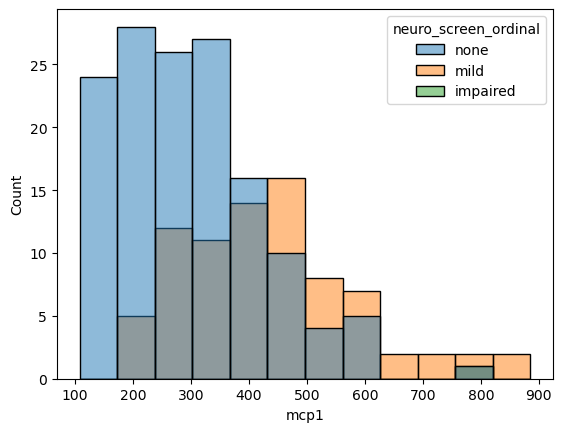

In [18]:
sns.histplot(data = data,
             x = 'mcp1',
             hue = 'neuro_screen_ordinal')

If we don't like overlapping plots we can make it like a heatmap where the color indicates the count.

<Axes: xlabel='mcp1', ylabel='neuro_screen_ordinal'>

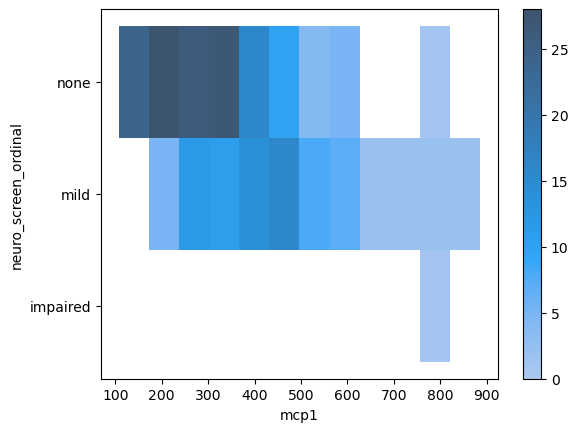

In [19]:
sns.histplot(data = data,
             x = 'mcp1',
             y  = 'neuro_screen_ordinal',
             cbar = True)

Aggregate statistic to compute in each bin.
* count: show the number of observations in each bin
* frequency: show the number of observations divided by the bin width
* probability or proportion: normalize such that bar heights sum to 1
* percent: normalize such that bar heights sum to 100
* density: normalize such that the total area of the histogram equals 1

<Axes: xlabel='mcp1', ylabel='Percent'>

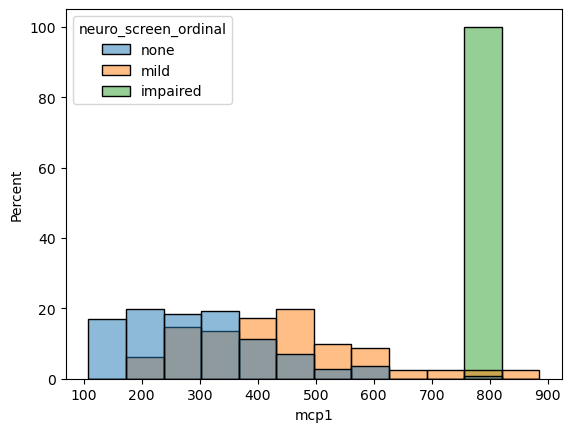

In [20]:
sns.histplot(data = data,
             x = 'mcp1',
             hue = 'neuro_screen_ordinal',
             stat = 'percent',
             common_norm=False) # Each group should have its own "sum to 100"
# hue_order = ['none', 'mild']

## Measuring Correlation

The previous figures measured one (or more) categorical variables and a single quantitative variable.
If we want to understand how correlated any two quantitative variables are to each other.

<Axes: xlabel='mcp1', ylabel='tnfalpha'>

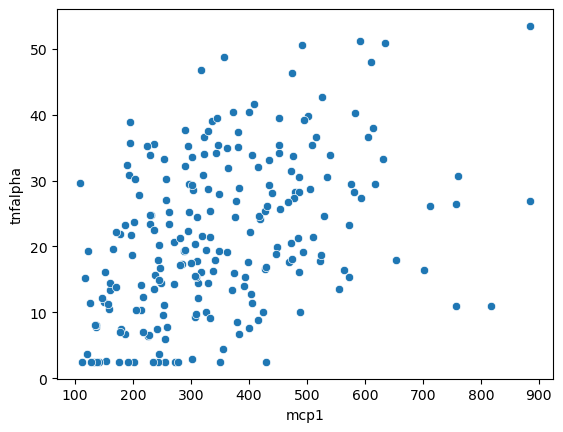

In [21]:
sns.scatterplot(data = data,
                x = 'mcp1', 
                y = 'tnfalpha')

We can also use a _regression plot_ to draw a best fit line with a confidence interval indicated by a shadow.

<Axes: xlabel='mcp1', ylabel='tnfalpha'>

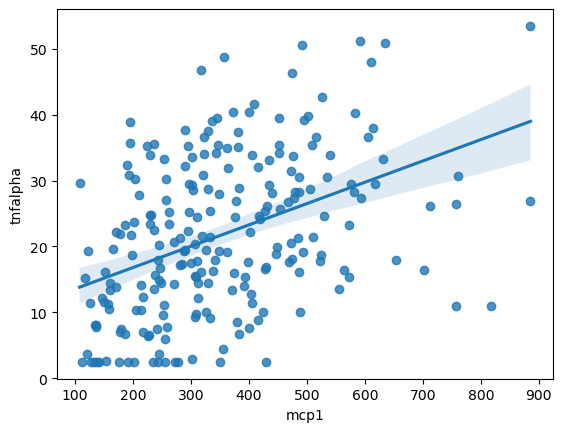

In [22]:
sns.regplot(data = data,
            x = 'mcp1',
            y = 'tnfalpha')

## Figure Level Interface

All of the code we've been running above generates a single figure.
The functions below automate generating multiple figures across different facets of the data.
This is an incredibly useful way to explore relationships in your data.

### Categorical with `catplot`

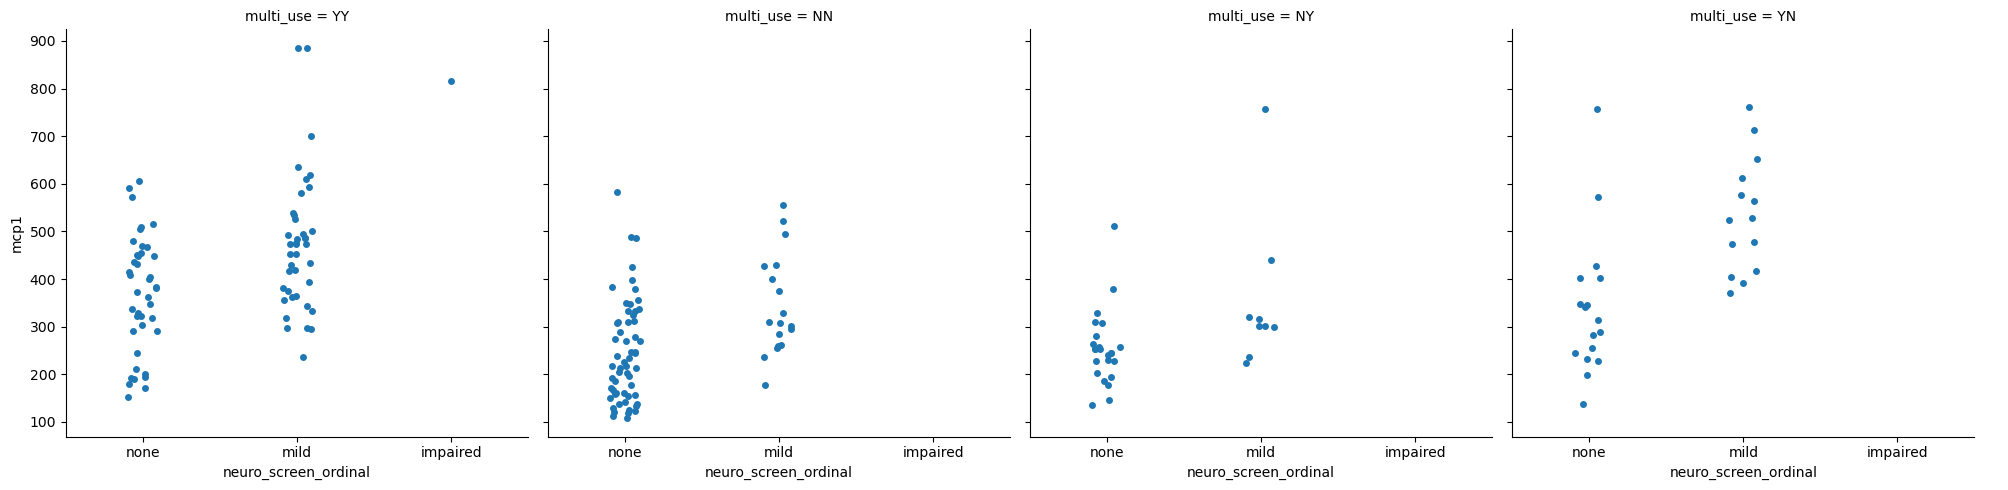

In [23]:
sns.catplot(data = data,
            x = 'neuro_screen_ordinal',
            y = 'mcp1',
            col = 'multi_use')

# Try:
# col_wrap = 2
# kind = 'bar', box, etc
# Other groupings across row and hue
#  Sex, isAA
#  pd.cut(data['Age'], [18, 30, 50, 100], labels=['young', 'adult', 'aged'])
#  pd.cut(data['tnfalpha'], 3, labels=['low', 'med', 'high'])

Each of the plots splits the data into a different categorical subset, then only plots the data within that set.
Use the examples in the comments to explore ways to visualize the data.

### Relational with `relplot`

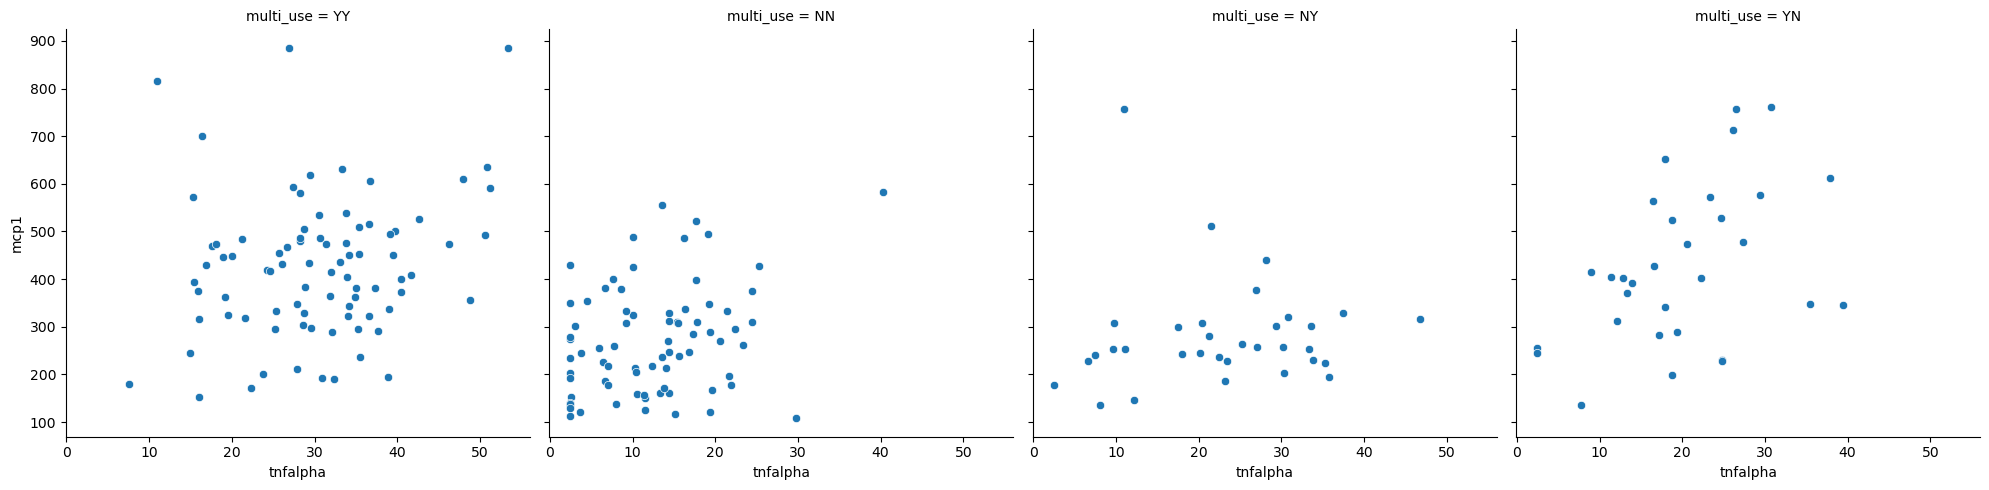

In [24]:
sns.relplot(data = data,
            x = 'tnfalpha',
            y = 'mcp1',
            col = 'multi_use')

# Try:
# col_wrap = 2
# kind = 'bar', box, etc
# Other groupings across row and hue
#  Sex, isAA
#  pd.cut(data['Age'], [18, 30, 50, 100], labels=['young', 'adult', 'aged'])
#  pd.cut(data['tnfalpha'], 3, labels=['low', 'med', 'high'])

### Linear model regression plots with `lmplot`

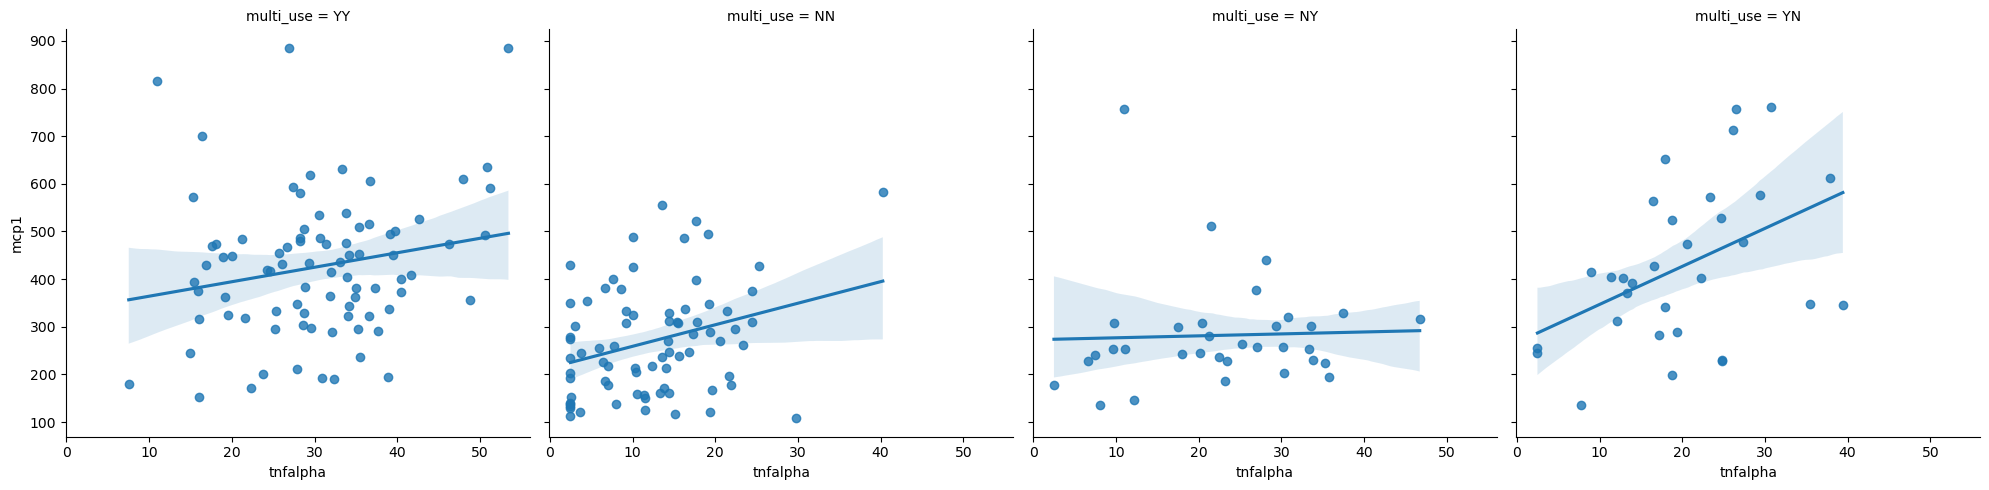

In [25]:
sns.lmplot(data = data,
            x = 'tnfalpha',
            y = 'mcp1',
            col = 'multi_use')
# Try:
# col_wrap = 2
# kind = 'bar', box, etc
# Other groupings across row and hue
#  Sex, isAA
#  pd.cut(data['Age'], [18, 30, 50, 100], labels=['young', 'adult', 'aged'])
#  pd.cut(data['tnfalpha'], 3, labels=['low', 'med', 'high'])

## Plotting Multiple Columns

You'll probably notice that all of the graphs so far have visualized a single cytokine.
What if we wanted multiple cytokines in the same figure?

In [26]:
# This doesn't work
# sns.stripplot(data = data,
#               x = 'neuro_screen_category',
#               hue = 'Sex',
#               y = ['mcp1', 'tnfalpha'],
#               dodge = True)

### I'm `pd.melt`ing

Seaborn only plots _long_ data.
We need to convert our _wide_ data into _long_ data first.
This is melting.

In [27]:
data.head()

,Sex,Age,isAA,egf,eotaxin,fgfbasic,gcsf,gmcsf,hgf,ifnalpha,...,mip1beta,tnfalpha,vegf,cocaine_use,cannabinoid_use,neuro_screen_impairment_level,bmi,years_infected,multi_use,neuro_screen_ordinal
0,Male,53.0,Checked,65.01,170.20,50.32,117.14,2.51,481.37,110.79,...,151.15,17.61,7.54,True,True,none,21,18,YY,none
1,Female,62.0,Checked,232.83,118.23,36.03,215.38,24.53,988.71,66.13,...,230.87,51.22,31.60,True,True,none,22,16,YY,none
2,Male,60.0,Checked,84.84,55.27,13.22,14.08,0.48,364.31,78.67,...,68.34,2.48,0.84,False,False,none,25,16,NN,none
3,Male,62.0,Checked,24.13,70.18,4.12,14.08,1.33,510.36,118.64,...,49.15,10.93,3.53,True,True,impaired,29,21,YY,impaired
4,Male,54.0,Checked,186.98,69.18,32.56,184.74,12.55,395.87,40.79,...,241.00,32.01,10.81,True,True,none,26,16,YY,none


In [28]:
melted_data = pd.melt(data,
                      id_vars = ['Sex', 'Age', 'neuro_screen_ordinal', 'multi_use'], # What we want replicated across all rows of the same sample
                      value_vars = ['mcp1', 'tnfalpha', 'il6'], # What columns we want to melt into rows
                      value_name = 'concentration', # The name of the value column after melting
                      var_name = 'cytokine') # The name of the variable column after melting
melted_data

,Sex,Age,neuro_screen_ordinal,multi_use,cytokine,concentration
0,Male,53.0,none,YY,mcp1,468.72
1,Female,62.0,none,YY,mcp1,591.70
2,Male,60.0,none,NN,mcp1,132.80
3,Male,62.0,impaired,YY,mcp1,816.71
4,Male,54.0,none,YY,mcp1,414.97
...,...,...,...,...,...,...
667,Male,44.0,none,NN,il6,16.69
668,Male,59.0,mild,YY,il6,15.55
669,Male,63.0,mild,YY,il6,11.94
670,Male,41.0,mild,NY,il6,12.48


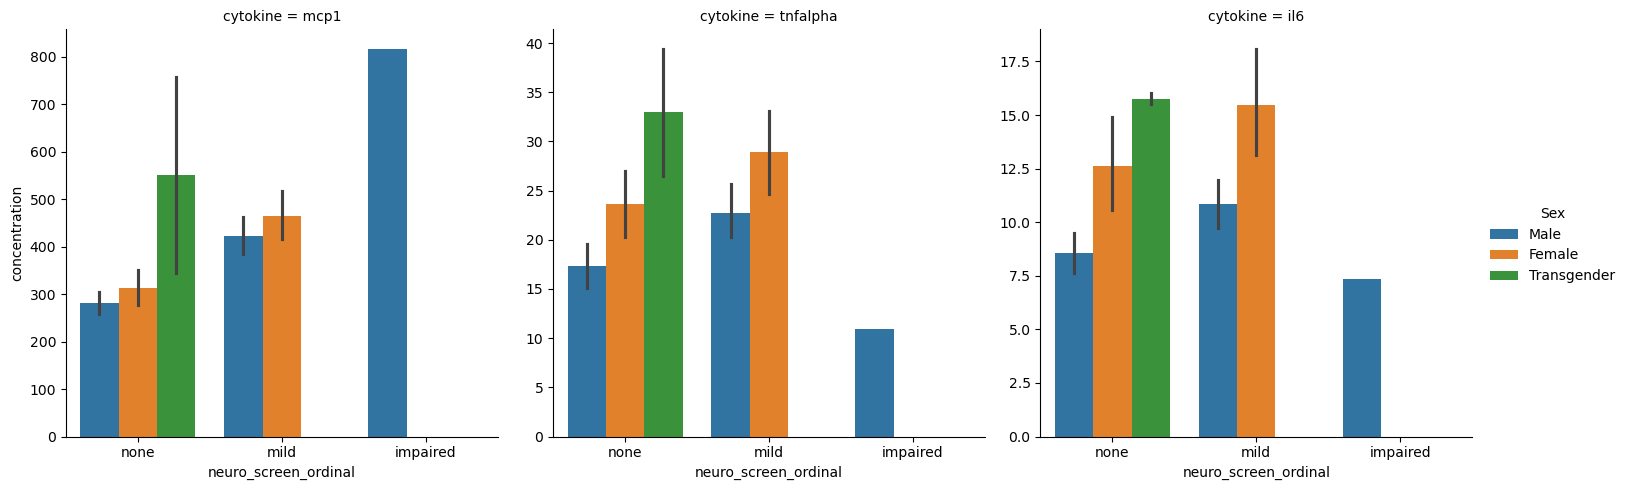

In [29]:
sns.catplot(data = melted_data,
            x = 'neuro_screen_ordinal',
            y = 'concentration',
            col = 'cytokine',
            hue = 'Sex',
            sharey=False,
            kind = 'bar')

Whether to use melting data and figure-level seaborn functions or using `plt.subplots` and then doing axis-level figure generation is a matter of personal perference and the situation.

---------------------------------------------